# Import the neccessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow.keras
import cv2
import os
import glob
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

Init Plugin
Init Graph Optimizer
Init Kernel


# Reading images data

In [3]:
dir_path = "/Volumes/GoogleDrive/My Drive/Projects/RPS_Data/Image_Data"
categories = ['rock', 'paper', 'scissors', 'replay', 'none']
image_data = []
for cat in categories:
    path = os.path.join(dir_path, cat)
    for img in glob.glob(path + "/*.jpg"):
        img_arr = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (227, 227))
        image_data.append([img_arr, categories.index(cat)])

- Define the directory path where the data are stored.
- The data contains 5 classes:
    - rock - hand command rock symbol
    - paper - hand command paper symbol
    - scissors - hand command paper symbol
    - replay - hand command to replay
    - none - random noise
- The dataset is separated into sub-folders for each class. So, each image can be easily read and assign label/class to it.
- Read image data using opencv, resize it to an appropriate size (227,227), and then assign the class to it using the index of the folder that it's in.

- Shuffle the image data, so we can take a look at the image for different class
- Separate the image data into input_data and the label
- Plot the first 9 images

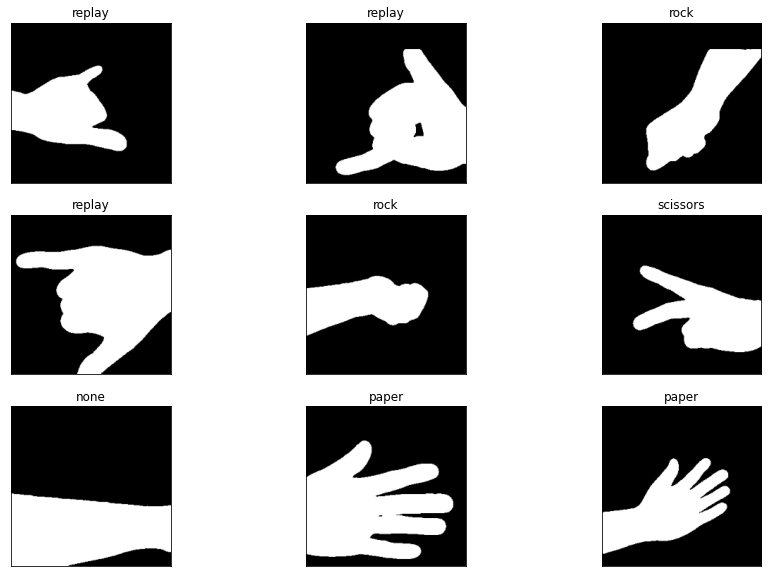

In [8]:
random.shuffle(image_data)
input_data = []
label = []

for X, y in image_data:
    input_data.append(X)
    label.append(y)

plt.figure(1, figsize=(15, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(image_data[i][0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(categories[label[i]])
plt.show()

In [ ]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data / 255.0

label = utils.to_categorical(label, num_classes=len(categories), dtype='i1')
input_data.shape = (-1, 227, 227, 1)
